# Defensive Overlay

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import skew, kurtosis

from final_deliverable.utils_final import *

# Load Data

In [166]:
# Load the first sheet of the provided Excel file
df = pd.read_excel('equity_global_monthly_rets.xlsx')

# Set the 'Date' column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [167]:
df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2003-04-14,0.0059,0.0035,0.0000,0.0069,0.0000,0.0000,0.0090,0.0042,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0028,-0.0009,-0.0028,0.0000,0.0000,0.0207,0.0204
2003-05-01,0.1023,0.1299,0.0000,0.0811,0.0000,0.0000,0.0997,0.0606,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0328,0.0056,0.0169,0.0000,0.0000,0.0332,0.0638
2003-06-02,0.0422,0.3734,0.0000,0.1223,0.0000,0.0000,0.1478,0.2189,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0603,0.0047,0.0370,0.0000,0.0000,0.0593,0.0683
2003-07-01,0.1001,0.1734,0.0000,0.0544,0.0000,0.0000,0.0618,0.1381,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0115,0.0035,-0.0025,0.0000,0.0000,0.0158,0.0260
2003-08-01,0.0754,0.1196,0.0000,-0.0382,0.0000,0.0000,0.0560,0.0665,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0922,-0.0049,-0.0515,0.0000,0.0000,-0.0002,0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,-0.0917,0.0194,0.0177,-0.0209,-0.1047,-0.0451,-0.0171,-0.1395,-0.0683,-0.0274,...,-0.0355,0.1047,0.0044,-0.0383,-0.0001,-0.0179,0.0025,-0.0240,-0.0609,-0.0974
2023-02-01,0.2016,0.0573,0.1621,0.1527,0.2240,0.1977,0.0723,0.1461,0.1303,0.0929,...,0.0778,0.1146,0.0626,0.0690,0.0087,0.0352,0.0379,0.0501,0.0787,0.1378
2023-03-01,-0.0596,0.0690,0.0315,0.0111,0.0119,-0.0233,-0.0422,-0.0084,-0.0827,0.0155,...,-0.0085,-0.0294,-0.0526,-0.0699,-0.0116,-0.0473,-0.0412,-0.0571,-0.0391,-0.0323


# Calculate Maximum Drawdown on data

In [168]:
pred_binary = pd.read_excel('equity_global_predictions.xlsx')
date_shifted = pred_binary['Date'].shift(-1)
pred_binary_shifted = pred_binary.copy()
pred_binary_shifted['Date'] = date_shifted
pred_binary_shifted

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
0,2007-06-01,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,0
1,2007-07-02,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,1
2,2007-08-01,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,1
3,2007-09-04,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,0
4,2007-10-01,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-01-03,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
188,2023-02-01,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
189,2023-03-01,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
190,2023-04-03,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [169]:
pred_binary_shifted = pred_binary_shifted.set_index("Date")

common_dates = df.index.intersection(pred_binary_shifted.index)
pred_binary_shifted = pred_binary_shifted.loc[common_dates]

for col in pred_binary_shifted.columns:
    if col in df.columns:
        pred_binary_shifted[col] = pred_binary_shifted[col].where(pred_binary_shifted[col] != 1, df[col])

pred_binary_shifted

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2007-06-01,0.0359,0.0399,0.0000,0.0499,0.0000,0.0000,0.0850,0.0298,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0290,-0.0008,-0.0182,0.0000,0.0000,0.0364,0.0000
2007-07-02,0.0292,0.0423,0.0000,0.0057,0.0000,0.0000,-0.0049,0.0095,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0003,0.0059,0.0011,0.0000,0.0000,-0.0106,0.0128
2007-08-01,-0.0377,-0.0019,0.0000,-0.0530,0.0000,0.0000,-0.0733,-0.0387,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0255,0.0074,0.0182,0.0000,0.0000,-0.0353,-0.0023
2007-09-04,-0.0294,0.1453,0.0000,0.0333,0.0000,0.0000,0.0224,0.0557,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0201,0.0118,0.0236,0.0000,0.0000,0.0181,0.0000
2007-10-01,0.0909,0.0503,0.0000,0.0848,0.0000,0.0000,0.0620,0.1178,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0088,0.0054,0.0048,0.0000,0.0000,0.0399,0.0472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,0.2633,0.0116,0.1347,0.0404,0.0000,0.1091,0.1621,-0.0171,0.1897,0.0698,...,0.0079,0.1249,0.0319,0.0954,0.0000,0.0476,0.0723,0.0972,0.0595,0.0676
2023-01-03,-0.0917,0.0194,0.0177,0.0000,-0.1047,-0.0451,-0.0171,-0.1395,-0.0683,-0.0274,...,-0.0355,0.1047,0.0044,-0.0383,-0.0001,-0.0179,0.0025,-0.0240,-0.0609,-0.0974
2023-02-01,0.2016,0.0573,0.1621,0.1527,0.2240,0.1977,0.0723,0.1461,0.1303,0.0929,...,0.0778,0.1146,0.0626,0.0690,0.0000,0.0352,0.0379,0.0501,0.0787,0.1378


In [170]:
# Calculate cumulative returns
cumulative_returns = (1 + pred_binary_shifted).cumprod()

# Calculate rolling maximum
rolling_max = cumulative_returns.cummax()

# Calculate drawdown
drawdown = (cumulative_returns - rolling_max) / rolling_max

# Identify drawdown periods (boolean mask)
drawdown_periods = drawdown < -0.05  # Threshold: 5% drawdown

In [171]:
drawdown_periods

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2007-06-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2007-07-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2007-08-01,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2007-09-04,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2007-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,False,True,True,True,True,True
2023-01-03,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,False,True,True,True,True,True
2023-02-01,True,True,True,False,False,True,False,True,True,True,...,True,True,True,True,False,True,True,True,True,True


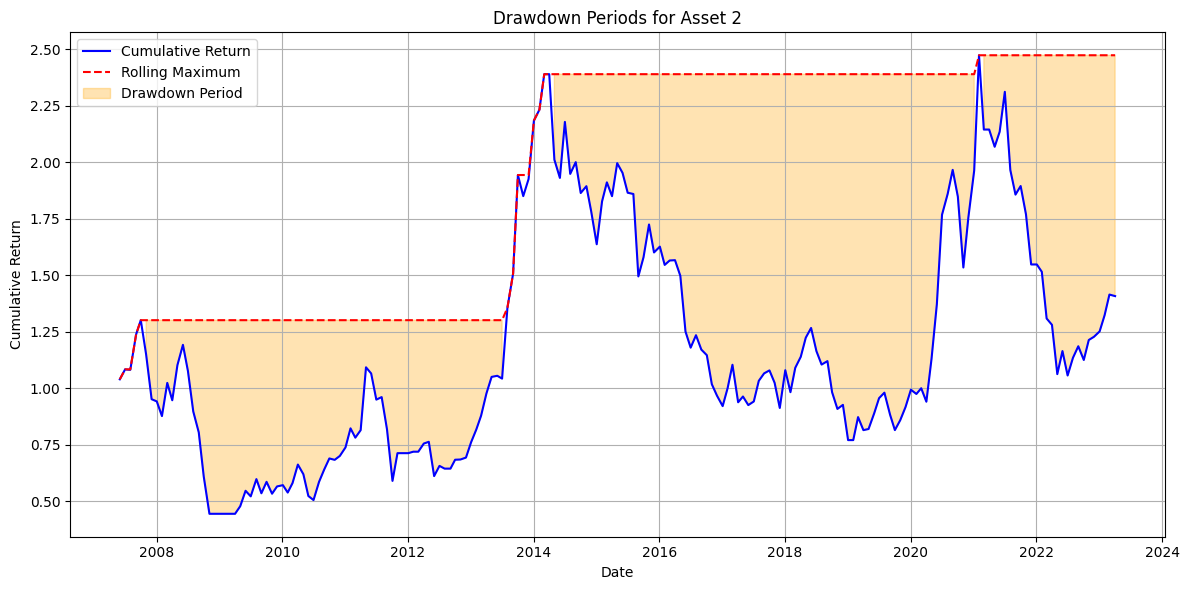

In [172]:
# Plot cumulative returns and drawdown for one asset (e.g., 'Asset1')
asset = 'Asset 2'

plt.figure(figsize=(12, 6))

# Plot cumulative returns and rolling maximum
plt.plot(cumulative_returns[asset], label="Cumulative Return", color="blue")
plt.plot(rolling_max[asset], label="Rolling Maximum", color="red", linestyle="--")

# Highlight drawdown periods
plt.fill_between(
    drawdown.index,
    cumulative_returns[asset],
    rolling_max[asset],
    where=drawdown_periods[asset],
    color="orange",
    alpha=0.3,
    label="Drawdown Period"
)

plt.title(f"Drawdown Periods for {asset}")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate risk signals

In [173]:
# Sample data
portfolio_weights = pd.read_excel('classification_equity_global_Drawdown_weight.xlsx')
dates = portfolio_weights['Date'].values

portfolio_weights = portfolio_weights.set_index('Date')

# Skewness/ Vol/ VAR (expanding/rolling window)
# Compare different metrics' results


In [174]:
portfolio_weights

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-01,0.0000,0.0812,0.0000,0.0000,0.0000,0.0000,0.0000,0.7087,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2008-06-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6594,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1138
2008-07-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7355,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2008-08-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0173,0.0000,0.0000,0.0000,0.0000,0.0000
2008-09-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.6728,0.0000,0.3272,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [175]:
rolling_volatility = pred_binary_shifted.rolling(window=8, min_periods=3).std()
rolling_volatility

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-01,0.0407,0.0248,0.0000,0.0516,0.0000,0.0000,0.0794,0.0352,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0273,0.0043,0.0182,0.0000,0.0000,0.0364,0.0081
2007-09-04,0.0384,0.0626,0.0000,0.0452,0.0000,0.0000,0.0656,0.0399,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0247,0.0052,0.0189,0.0000,0.0000,0.0316,0.0069
2007-10-01,0.0527,0.0543,0.0000,0.0518,0.0000,0.0000,0.0618,0.0579,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0214,0.0045,0.0164,0.0000,0.0000,0.0322,0.0208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,0.1353,0.0950,0.0837,0.0507,0.1074,0.0797,0.0779,0.0617,0.1198,0.0504,...,0.0536,0.0648,0.0352,0.0687,0.0020,0.0350,0.0402,0.0493,0.0643,0.0809
2023-01-03,0.1376,0.0660,0.0761,0.0497,0.1042,0.0743,0.0753,0.0819,0.1121,0.0485,...,0.0492,0.0757,0.0318,0.0592,0.0016,0.0323,0.0363,0.0498,0.0608,0.0773
2023-02-01,0.1464,0.0611,0.0933,0.0701,0.1174,0.1015,0.0785,0.0921,0.1197,0.0509,...,0.0555,0.0838,0.0396,0.0662,0.0006,0.0351,0.0389,0.0538,0.0679,0.0944


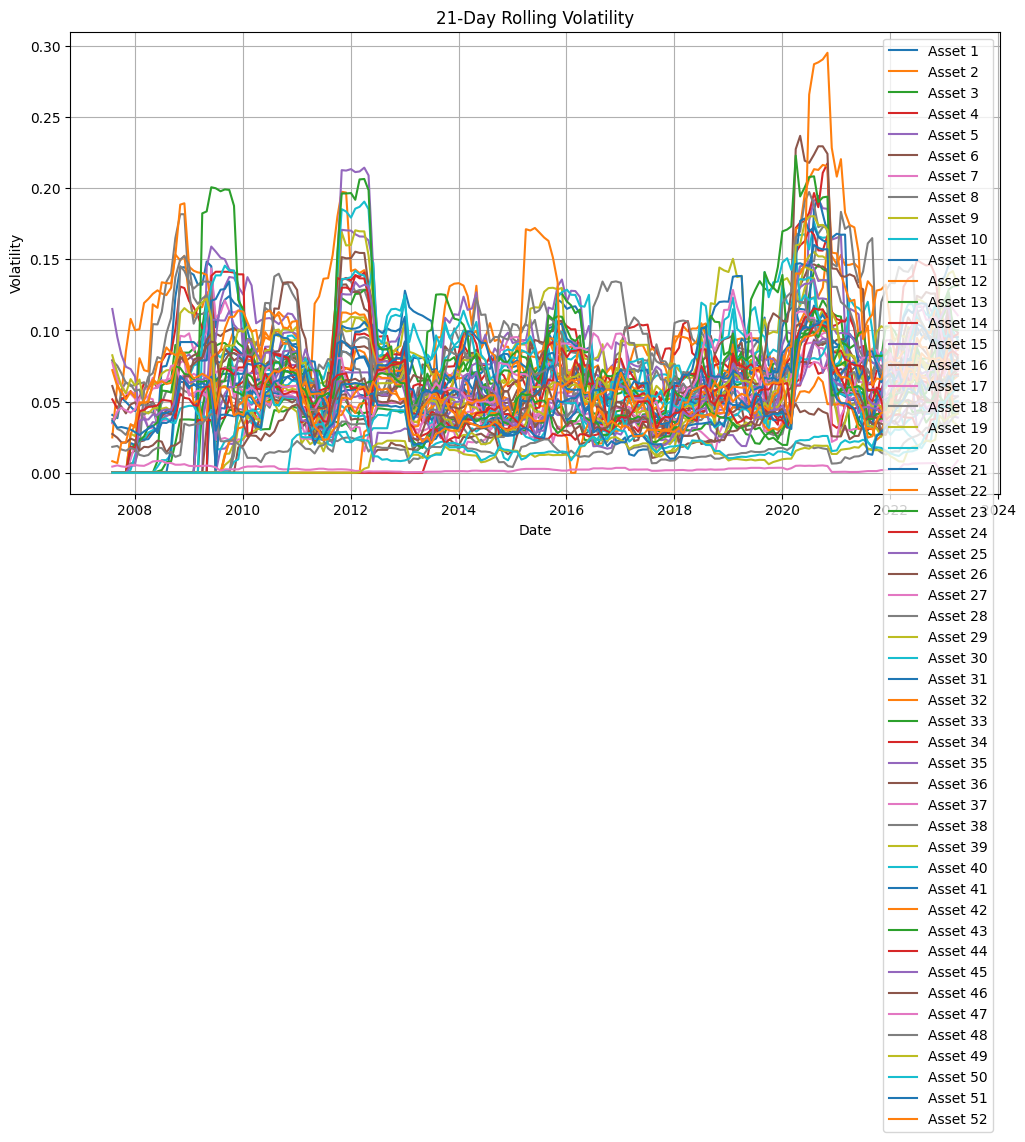

In [176]:
selected_assets = pred_binary_shifted  # Plot the first 3 assets for simplicity

plt.figure(figsize=(12, 6))
for asset in selected_assets:
    plt.plot(rolling_volatility.index, rolling_volatility[asset], label=asset)

plt.title("21-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

In [177]:
def calculate_rolling_var(df, window=8, confidence_level=0.05):
    var_df = df.rolling(window=window).apply(
        lambda x: np.percentile(x, confidence_level * 100), raw=True
    )
    return var_df

rolling_var = calculate_rolling_var(pred_binary_shifted, window=20, confidence_level=0.05)

<Axes: title={'center': 'Rolling VaR (95%) for Each Asset'}, xlabel='Date'>

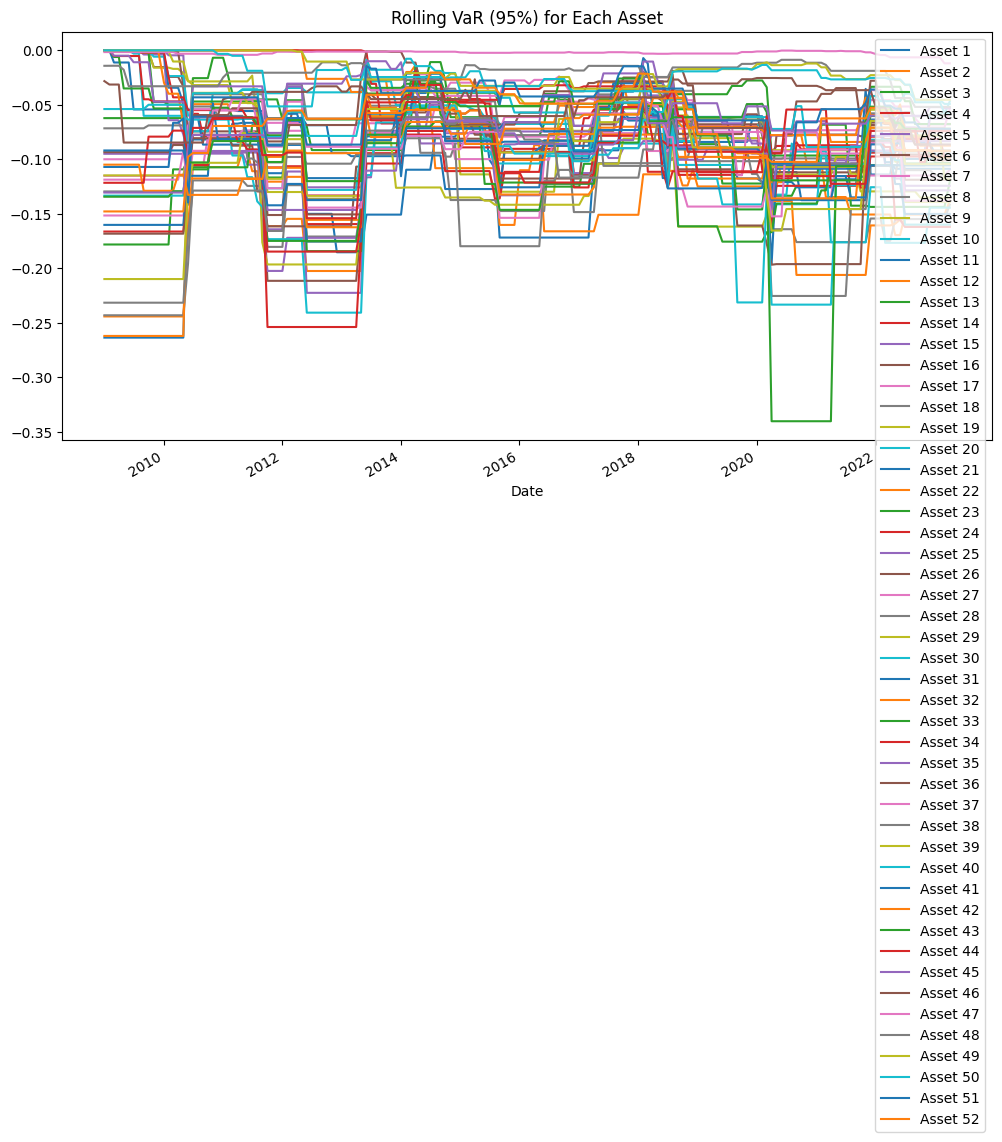

In [178]:
rolling_var.plot(figsize=(12, 6), title="Rolling VaR (95%) for Each Asset")

# Apply the Defensive Overlay dynamically

### Description：

The function dynamically applies a defensive overlay at the asset level based on three signals: rolling volatility, rolling VaR, and drawdown periods. Assets are categorized as “low risk” if they fall in the bottom 30% of volatility, satisfy a VaR threshold, or are not in a drawdown period. These low-risk assets remain untouched. For other assets, the function dynamically adjusts their weights based on risk signals, allocating a portion of their weight to cash while normalizing the portfolio weights.

In [179]:
def apply_dynamic_defensive_overlay(portfolio_weights, rolling_volatility, rolling_var, drawdown_period, 
                                     cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3):
    """
    Dynamically adjusts portfolio weights based on rolling volatility, rolling VaR, and drawdown periods.

    Args:
        portfolio_weights (pd.DataFrame): Portfolio weights of assets.
        rolling_volatility (pd.DataFrame): Asset-specific rolling volatility.
        rolling_var (pd.DataFrame): Asset-specific rolling VaR.
        drawdown_period (pd.DataFrame): Boolean DataFrame indicating drawdown periods (True for drawdown).
        cash_allocation (float): Percentage of the weight allocated to cash during high risk.
        volatility_threshold (float): Percentile threshold for low/high volatility (e.g., 0.3 for bottom 30% or top 30%).
        var_threshold (float): Percentile threshold for low/high VaR (e.g., 0.3 for bottom 30% or top 30%).

    Returns:
        pd.DataFrame: Adjusted portfolio weights with defensive overlay applied dynamically.
    """
    # Create a DataFrame for adjusted weights
    adjusted_weights = portfolio_weights.copy()
    adjusted_weights['Cash'] = 0.0  # Add a cash column

    # Loop over dates and assets
    for date in adjusted_weights.index:
        # Filter historical data up to the current date
        past_vol = rolling_volatility.loc[:date]
        past_var = rolling_var.loc[:date]

        # Calculate percentiles for the current date and historical data
        vol_threshold_value_low = past_vol.quantile(volatility_threshold)
        vol_threshold_value_high = past_vol.quantile(1 - volatility_threshold)
        var_threshold_value_low = past_var.quantile(var_threshold)
        var_threshold_value_high = past_var.quantile(1 - var_threshold)

        # Identify low-risk assets
        low_risk_assets = []
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] <= vol_threshold_value_low[asset] and
                rolling_var.loc[date, asset] >= var_threshold_value_high[asset] and
                not drawdown_period.loc[date, asset]):
                low_risk_assets.append(asset)

        # Adjust weights for high-risk assets
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] > vol_threshold_value_high[asset] or
                rolling_var.loc[date, asset] < var_threshold_value_low[asset] or
                drawdown_period.loc[date, asset]):
                # Reduce weight for high-risk assets and allocate to cash
                adjusted_weights.loc[date, asset] *= (1 - cash_allocation)
                adjusted_weights.loc[date, 'Cash'] += cash_allocation / len(portfolio_weights.columns)

        # Normalize weights to ensure they sum to 1
        adjusted_weights.loc[date, :] /= adjusted_weights.loc[date, :].sum()

    return adjusted_weights


# Apply the updated defensive overlay function
adjusted_portfolio_asset_weight = apply_dynamic_defensive_overlay(
    portfolio_weights, rolling_volatility, rolling_var, drawdown_periods, 
    cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3
)

1.	Inputs:
	- portfolio_weights: DataFrame containing portfolio weights for each asset.
	- rolling_volatility: DataFrame with rolling volatility values for each asset.
	- rolling_var: DataFrame with rolling VaR values for each asset.
	- drawdown_period: Boolean DataFrame indicating whether each asset is in a drawdown period.
	- cash_allocation: The fraction of the weight to allocate to cash for high-risk assets.
	- volatility_threshold: Threshold for low volatility classification (bottom 30% by default).
	- var_threshold: VaR threshold for low risk classification.
2.	Low-risk asset identification:
	- An asset is considered low risk if:
	- Its volatility is in the bottom 30% (<= rolling_volatility.quantile(volatility_threshold)).
	- Its VaR is above the specified threshold (> var_threshold).
	- It is not in a drawdown period (not drawdown_period).
3.	High-risk asset adjustment:
	- For assets not classified as low risk:
	- Reduce their weights by (1 - cash_allocation).
	- Allocate the reduced weight to cash evenly across all assets.
4.	Normalization:
	- Ensure that the total weights, including cash, sum to 1 for each date.

In [180]:
# Display the adjusted portfolio weights
adjusted_portfolio_asset_weight

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52,Cash
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-01,0.0000,0.0635,0.0000,0.0000,0.0000,0.0000,0.0000,0.5538,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1481
2008-06-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5306,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0916,0.1724
2008-07-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5976,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1875
2008-08-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0140,0.0000,0.0000,0.0000,0.0000,0.0000,0.1929
2008-09-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.5736,0.0000,0.2789,0.0000,0.0000,0.0000,0.0000,0.1475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2959
2023-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3000
2023-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2918


In [181]:
def calculate_portfolio_returns(weights_df, returns_df):
    """
    Calculate the daily portfolio returns by aligning dates, multiplying asset weights with their corresponding returns.

    Args:
        weights_df (pd.DataFrame): DataFrame containing portfolio weights (including 'Cash').
        returns_df (pd.DataFrame): DataFrame containing asset returns.

    Returns:
        pd.Series: Daily portfolio returns.
    """
    # Align the index (dates) of weights and returns DataFrames
    returns_df = returns_df.iloc[-len(weights_df):]

    # Remove the 'Cash' column from weights
    weights_no_cash = weights_df.drop(columns=['Cash'])

    # Ensure the weights and returns DataFrames align on columns (assets)
    weights_no_cash = weights_no_cash[returns_df.columns]

    # Calculate daily portfolio returns
    daily_portfolio_returns = np.sum(weights_no_cash * returns_df.values, axis=1)

    return daily_portfolio_returns

def calculate_cum_return(ret):
    res = []
    cum_sum = 1
    for i in range(len(ret)):
        cum_sum*=(1+ret[i])
        res.append(cum_sum)
    return res


monthly_returns = calculate_portfolio_returns(adjusted_portfolio_asset_weight, df)

In [182]:
def summary_statistics_annualized(returns, annual_factor=12):
    summary_statistics = pd.DataFrame(index=[0])
    summary_statistics['Mean'] = returns.mean()*annual_factor
    summary_statistics['Vol'] = returns.std()*np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean()/returns.std())*np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = skew(returns)
    summary_statistics['Excess Kurtosis'] = kurtosis(returns)
    summary_statistics['VaR (0.05)'] = np.quantile(returns, 0.05)
    summary_statistics['CVaR (0.05)'] = returns[returns<=np.quantile(returns, 0.05)].mean()
    cumulative_returns = np.cumprod(1+returns)
    rolling_max = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns-rolling_max)/rolling_max
    max_drawdown = drawdown.min()
    summary_statistics['Max Drawdown'] = max_drawdown
    return summary_statistics


In [183]:
summary_statistics_annualized(monthly_returns)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.1165,0.2009,0.5800,-0.1275,0.2271,0.6061,1.3389,-0.0822,-0.0993,-0.3507


<Axes: xlabel='Date'>

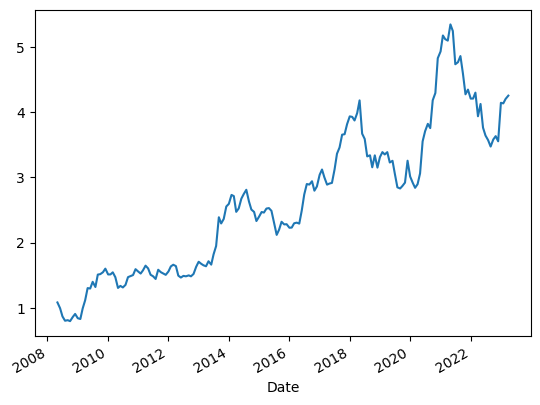

In [184]:
monthly_returns = pd.DataFrame(monthly_returns, columns = ['Return'])
monthly_returns['CumRet'] = calculate_cum_return(monthly_returns['Return'])
monthly_returns['CumRet'].plot()

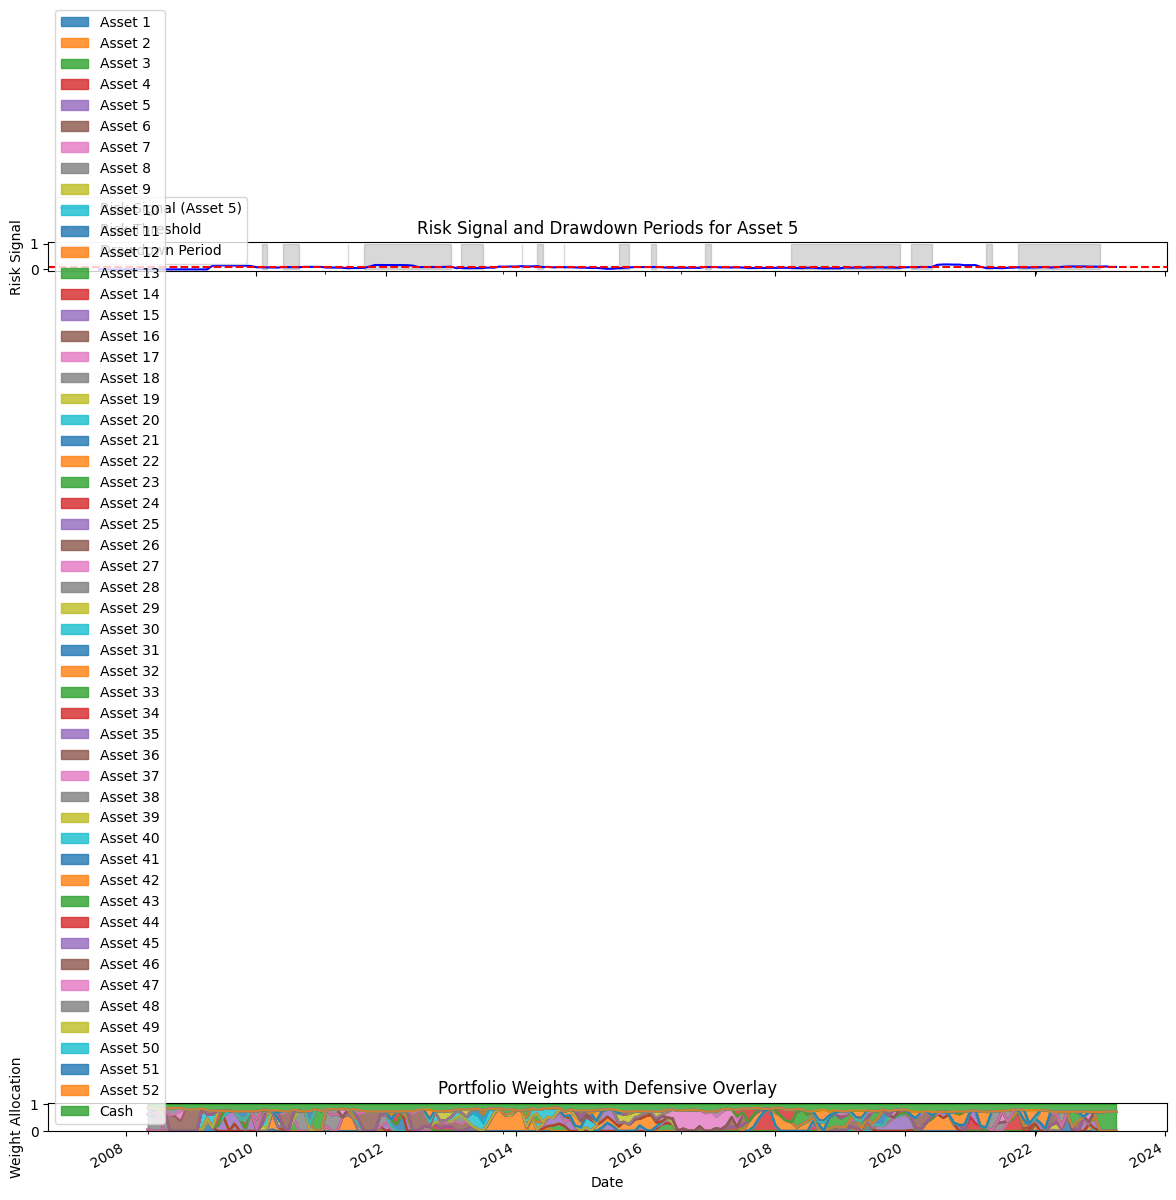

In [185]:
# Updated Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Example risk signal for Asset1
example_asset = 'Asset 5'

# Plot the risk signal and drawdown periods for the example asset
ax[0].plot(rolling_volatility[example_asset], label=f"Risk Signal ({example_asset})", color="blue")
ax[0].axhline(y=0.1, color="red", linestyle="--", label="Risk Threshold")
ax[0].fill_between(
    rolling_volatility.index,
    0,
    1,
    where=drawdown_periods[example_asset],
    color="gray",
    alpha=0.3,
    label="Drawdown Period"
)
ax[0].set_title(f"Risk Signal and Drawdown Periods for {example_asset}")
ax[0].set_ylabel("Risk Signal")
ax[0].legend()

# Plot adjusted portfolio weights as an area plot
adjusted_portfolio_asset_weight.plot.area(ax=ax[1], alpha=0.8)
ax[1].set_title("Portfolio Weights with Defensive Overlay")
ax[1].set_ylabel("Weight Allocation")
ax[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

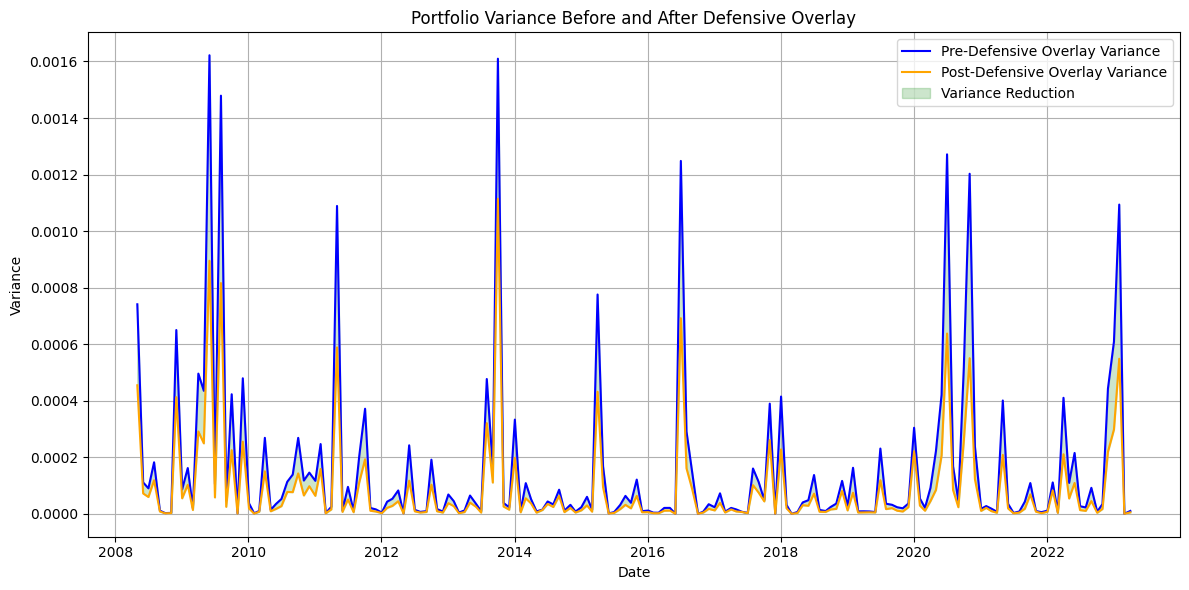

In [186]:
# Ensure variance calculations are based on asset returns
pre_defensive_variance = (df * portfolio_weights).var(axis=1).astype(float)
post_defensive_variance = (df * adjusted_portfolio_asset_weight.drop(columns="Cash")).var(axis=1).astype(float)

# Align indices to avoid mismatches
aligned_indices = pre_defensive_variance.index.intersection(post_defensive_variance.index)
pre_defensive_variance = pre_defensive_variance.loc[aligned_indices]
post_defensive_variance = post_defensive_variance.loc[aligned_indices]

# Convert data explicitly to numpy arrays for compatibility with fill_between
aligned_indices = aligned_indices.to_numpy()
pre_defensive_variance_np = pre_defensive_variance.to_numpy()
post_defensive_variance_np = post_defensive_variance.to_numpy()
where_condition_np = pre_defensive_variance_np > post_defensive_variance_np

# Re-plot with numpy arrays
plt.figure(figsize=(12, 6))
plt.plot(aligned_indices, pre_defensive_variance_np, label="Pre-Defensive Overlay Variance", color="blue")
plt.plot(aligned_indices, post_defensive_variance_np, label="Post-Defensive Overlay Variance", color="orange")
plt.fill_between(
    aligned_indices, 
    pre_defensive_variance_np, 
    post_defensive_variance_np, 
    where=where_condition_np, 
    color="green", alpha=0.2, label="Variance Reduction"
)
plt.title("Portfolio Variance Before and After Defensive Overlay")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()